In [3]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sbn
from pandas import DataFrame, read_csv
%matplotlib inline
loan_p_f = "D:\Python project\Loan Prediction\loanp_train.csv"
loan_p_data = pd.read_csv(loan_p_f)
print(loan_p_data.tail())

      Loan_ID  Gender Married Dependents Education Self_Employed  \
609  LP002978  Female      No          0  Graduate            No   
610  LP002979    Male     Yes         3+  Graduate            No   
611  LP002983    Male     Yes          1  Graduate            No   
612  LP002984    Male     Yes          2  Graduate            No   
613  LP002990  Female      No          0  Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
609             2900                0.0        71.0             360.0   
610             4106                0.0        40.0             180.0   
611             8072              240.0       253.0             360.0   
612             7583                0.0       187.0             360.0   
613             4583                0.0       133.0             360.0   

     Credit_History Property_Area Loan_Status  
609             1.0         Rural           Y  
610             1.0         Rural           Y  
611     

In [4]:
loan_p_data.isnull().sum().sum()

149

In [5]:
print("Data Shape",loan_p_data.shape)
loan_p_data.dtypes

Data Shape (614, 13)


Loan_ID               object
Gender                object
Married               object
Dependents            object
Education             object
Self_Employed         object
ApplicantIncome        int64
CoapplicantIncome    float64
LoanAmount           float64
Loan_Amount_Term     float64
Credit_History       float64
Property_Area         object
Loan_Status           object
dtype: object

In [6]:
#group bye
print(loan_p_data.groupby('Gender').size())
print(loan_p_data.groupby('Married').size())
print(loan_p_data.groupby('Dependents').size())
print(loan_p_data.groupby('Self_Employed').size())
print(loan_p_data.groupby('Education').size())
#print(loan_p_data.groupby('CoapplicantIncome').size())

Gender
Female    112
Male      489
dtype: int64
Married
No     213
Yes    398
dtype: int64
Dependents
0     345
1     102
2     101
3+     51
dtype: int64
Self_Employed
No     500
Yes     82
dtype: int64
Education
Graduate        480
Not Graduate    134
dtype: int64


In [7]:
#replace null Data
loan_p_data.Gender=loan_p_data.Gender.fillna('Male')
loan_p_data.Married=loan_p_data.Married.fillna('Yes')
loan_p_data.Dependents=loan_p_data.Dependents.fillna('0')
loan_p_data.Self_Employed=loan_p_data.Self_Employed.fillna('No')
loan_p_data.LoanAmount=loan_p_data.LoanAmount.fillna(loan_p_data.LoanAmount.median())
loan_p_data.Loan_Amount_Term=loan_p_data.Loan_Amount_Term.fillna(loan_p_data.Loan_Amount_Term.median())
loan_p_data.Credit_History=loan_p_data.Credit_History.fillna(loan_p_data.Credit_History.median())

In [8]:
loan_p_data.isnull().sum()

Loan_ID              0
Gender               0
Married              0
Dependents           0
Education            0
Self_Employed        0
ApplicantIncome      0
CoapplicantIncome    0
LoanAmount           0
Loan_Amount_Term     0
Credit_History       0
Property_Area        0
Loan_Status          0
dtype: int64

In [9]:
#gender change into 1 and 0 : 1 for male & 0 for female
loan_p_data.loc[(loan_p_data.Gender=='Male'), 'Gender']= 1
loan_p_data.loc[(loan_p_data.Gender=='Female'), 'Gender']= 0
#col ob=ject to int convert
loan_p_data.Gender=loan_p_data['Gender'].astype(str).astype(int)


In [10]:
loan_p_data.loc[(loan_p_data.Self_Employed =='Yes'), 'Self_Employed']= 1
loan_p_data.loc[(loan_p_data.Self_Employed =='No'), 'Self_Employed']= 0
#col object to int convert
loan_p_data.Self_Employed =loan_p_data['Self_Employed'].astype(str).astype(int)
loan_p_data.loc[(loan_p_data.Dependents =='3+'), 'Dependents']= 3
loan_p_data.Dependents =loan_p_data['Dependents'].astype(str).astype(int)

loan_p_data.loc[(loan_p_data.Property_Area =='Rural'), 'Property_Area']= 0
loan_p_data.loc[(loan_p_data.Property_Area =='Semiurban'), 'Property_Area']= 1
loan_p_data.loc[(loan_p_data.Property_Area =='Urban'), 'Property_Area']= 2
loan_p_data.Property_Area =loan_p_data['Property_Area'].astype(str).astype(int)

#loan_p_data.CoapplicantIncome =loan_p_data['CoapplicantIncome'].astype(str).astype(int)


In [11]:
loan_p_data.loc[(loan_p_data.Education =='Graduate'), 'Education']= 1
loan_p_data.loc[(loan_p_data.Education =='Not Graduate'), 'Education']= 0
loan_p_data.Education =loan_p_data['Education'].astype(str).astype(int)
loan_p_data.loc[(loan_p_data.Married =='Yes'), 'Married']= 1
loan_p_data.loc[(loan_p_data.Married =='No'), 'Married']= 0
loan_p_data.Married =loan_p_data['Married'].astype(str).astype(int)

In [12]:
# loan_p_data.loc[(loan_p_data.Loan_Amount_Term =='12.0'), 'Loan_Amount_Term']= 0
# loan_p_data.loc[(loan_p_data.Loan_Amount_Term =='36.0'), 'Loan_Amount_Term']= 1
# loan_p_data.loc[(loan_p_data.Loan_Amount_Term =='60.0'), 'Loan_Amount_Term']= 2
# loan_p_data.loc[(loan_p_data.Loan_Amount_Term =='84.0'), 'Loan_Amount_Term']= 3
# loan_p_data.loc[(loan_p_data.Loan_Amount_Term =='120.0'), 'Loan_Amount_Term']= 4
# loan_p_data.loc[(loan_p_data.Loan_Amount_Term =='180.0'), 'Loan_Amount_Term']= 5
# loan_p_data.loc[(loan_p_data.Loan_Amount_Term =='240.0'), 'Loan_Amount_Term']= 6
# loan_p_data.loc[(loan_p_data.Loan_Amount_Term =='300.0'), 'Loan_Amount_Term']= 7
# loan_p_data.loc[(loan_p_data.Loan_Amount_Term =='360.0'), 'Loan_Amount_Term']= 8
# loan_p_data.loc[(loan_p_data.Loan_Amount_Term =='480.0'), 'Loan_Amount_Term']= 9
# loan_p_data.Loan_Amount_Term =loan_p_data['Loan_Amount_Term'].astype(str).astype(int)

In [13]:
loan_p_data.head(5)


,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_Status
0,LP001002,1,0,0,1,0,5849,0.0,128.0,360.0,1.0,2,Y
1,LP001003,1,1,1,1,0,4583,1508.0,128.0,360.0,1.0,0,N
2,LP001005,1,1,0,1,1,3000,0.0,66.0,360.0,1.0,2,Y
3,LP001006,1,1,0,0,0,2583,2358.0,120.0,360.0,1.0,2,Y
4,LP001008,1,0,0,1,0,6000,0.0,141.0,360.0,1.0,2,Y


In [14]:
print(loan_p_data.groupby('Education').size())
print(loan_p_data.groupby('Dependents').size())
print(loan_p_data.groupby('Self_Employed').size())
print(loan_p_data.groupby('Loan_Amount_Term').size())
print(loan_p_data.groupby('Credit_History').size())
print(loan_p_data.groupby('Property_Area').size())
print(loan_p_data.groupby('Loan_Status').size())

Education
0    134
1    480
dtype: int64
Dependents
0    360
1    102
2    101
3     51
dtype: int64
Self_Employed
0    532
1     82
dtype: int64
Loan_Amount_Term
12.0       1
36.0       2
60.0       2
84.0       4
120.0      3
180.0     44
240.0      4
300.0     13
360.0    526
480.0     15
dtype: int64
Credit_History
0.0     89
1.0    525
dtype: int64
Property_Area
0    179
1    233
2    202
dtype: int64
Loan_Status
N    192
Y    422
dtype: int64


In [15]:
loan_p_data.CoapplicantIncome=loan_p_data['CoapplicantIncome'].astype(float).astype(int)
loan_p_data.LoanAmount=loan_p_data['LoanAmount'].astype(float).astype(int)
loan_p_data.Credit_History=loan_p_data['Credit_History'].astype(float).astype(int)

In [39]:
X_loand=loan_p_data[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_Status','Loan_ID']]
X_loand.head(10)
array = X_loand.values
Xn=array[:,0:11]
from sklearn.preprocessing import StandardScaler
stsc=StandardScaler()
Yn=array[:,11]
Xn = stsc.fit_transform(Xn)  
 

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


In [40]:
print("Len X :",len(Xn))
print("Len Y :",len(Yn))

Len X : 614
Len Y : 614


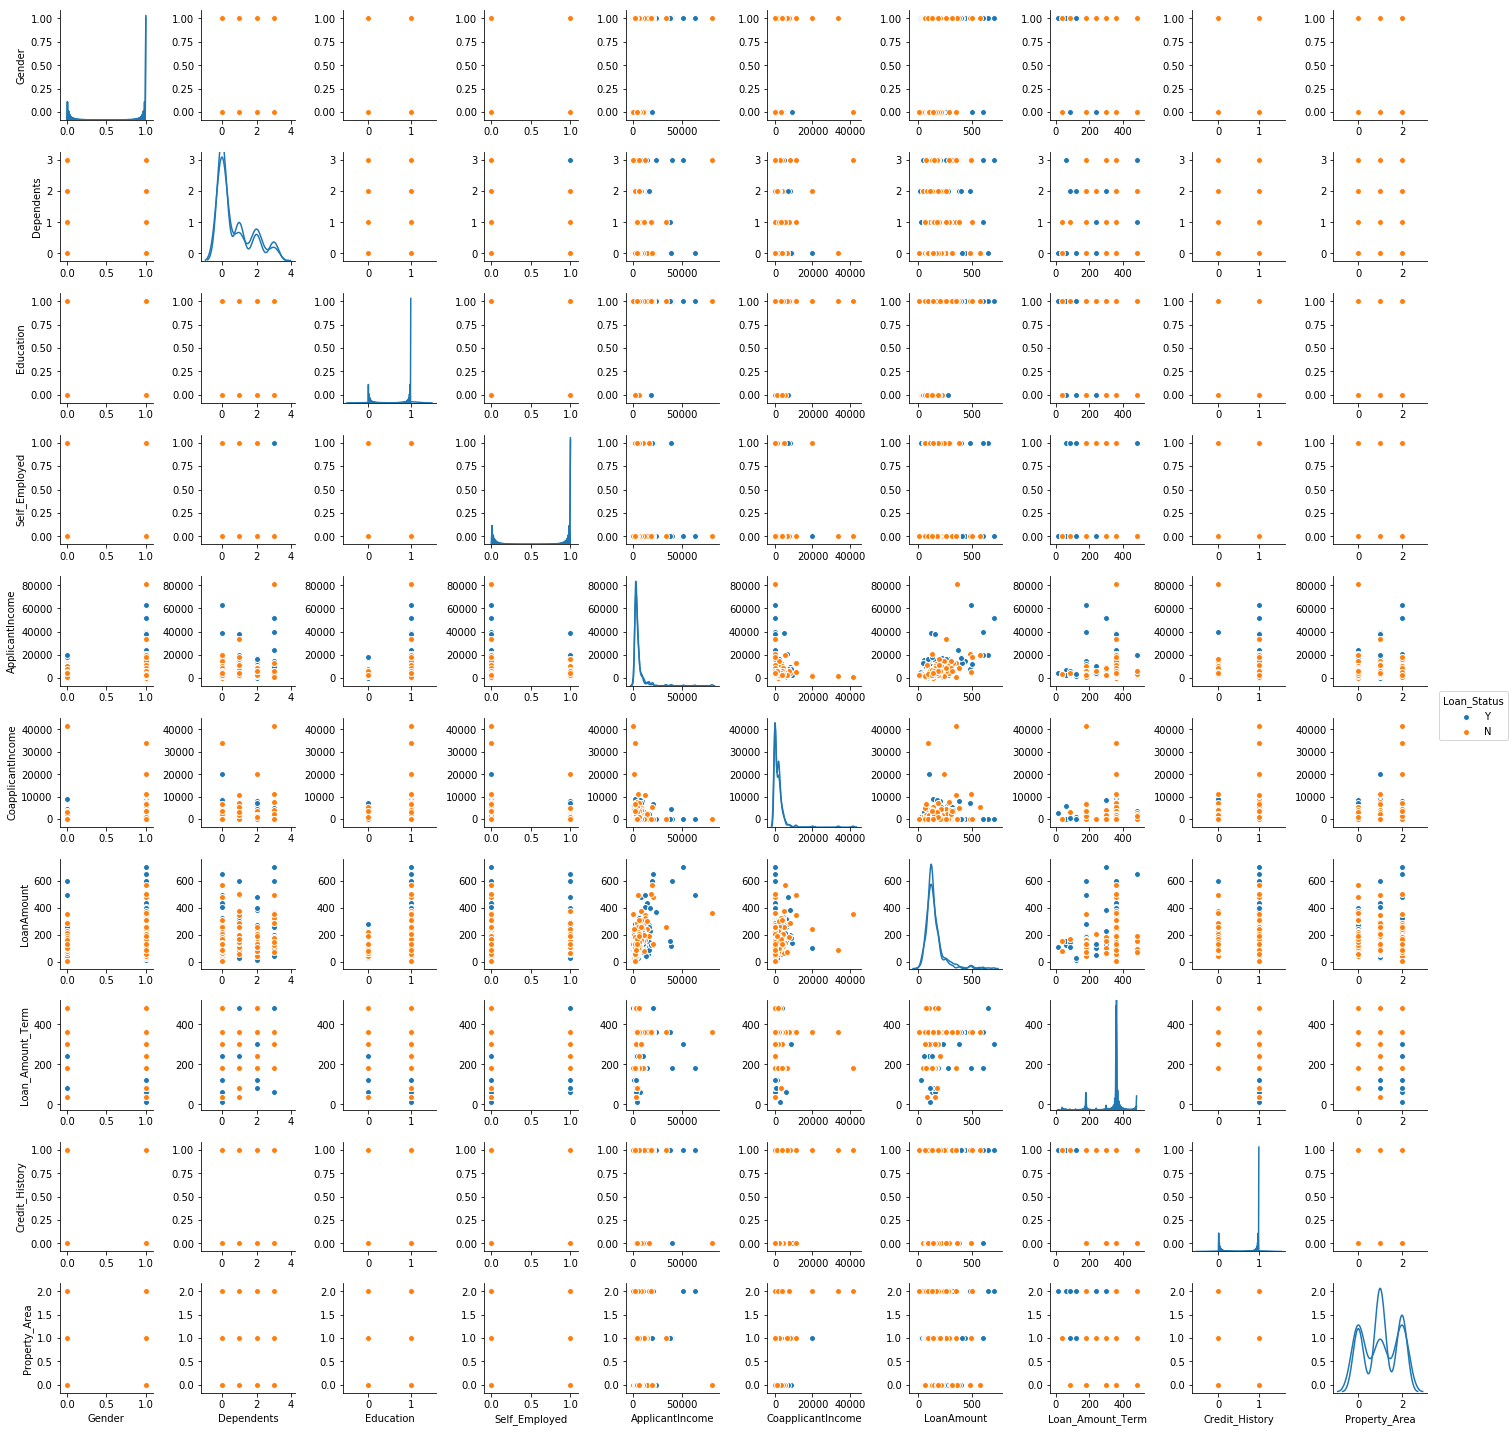

In [15]:
sbn.pairplot(loan_p_data, hue="Loan_Status", size=2, diag_kind="kde")
plt.show()

In [20]:
from sklearn import model_selection
seed = 7
scoring = 'accuracy'
print(Xn.shape)
print(Yn.shape)
validation_size = 0.20
seed = 7
X_trainn, X_testn, Y_trainn, Y_testn = model_selection.train_test_split(Xn, Yn, test_size=validation_size, random_state=seed)


(614, 11)
(614,)


In [21]:
from sklearn.linear_model import LogisticRegression
from sklearn.discriminant_analysis import LinearDiscriminantAnalysis
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.svm import SVC
from sklearn import model_selection
from sklearn.metrics import accuracy_score,confusion_matrix,classification_report
models_loan = []
models_loan.append(('LR_loan', LogisticRegression()))
models_loan.append(('LDA_loan', LinearDiscriminantAnalysis()))
models_loan.append(('KNN_loan', KNeighborsClassifier()))
models_loan.append(('Dtree_loan', DecisionTreeClassifier()))
models_loan.append(('NB_loan', GaussianNB()))
models_loan.append(('SVM_loan', SVC()))
# evaluate each model in turn
results_loan = []
names_p = []
for namep, modelp in models_loan:
	kfold = model_selection.KFold(n_splits=10, random_state=seed)
	cv_results_p = model_selection.cross_val_score(modelp, Xn, Yn, cv=kfold, scoring=scoring)
	results_loan.append(cv_results_p)
	names_p.append(namep)
	msg = "%s: %f (%f)" % (namep, cv_results_p.mean(), cv_results_p.std())
	print(msg)

LR_loan: 0.807985 (0.038146)
LDA_loan: 0.807985 (0.038146)
KNN_loan: 0.788313 (0.021346)
Dtree_loan: 0.736092 (0.040968)
NB_loan: 0.794923 (0.041847)
SVM_loan: 0.804654 (0.028415)


In [44]:
Lg_model1 = LogisticRegression()
Lg_model1.fit(X_trainn, Y_trainn)
pred_m = Lg_model1.predict(X_testn)
print("accuracy_score",accuracy_score(Y_testn, pred_m))
print("confusion_matrix",confusion_matrix(Y_testn, pred_m))
print("class r",classification_report(Y_testn, pred_m))
#print(pd.DataFrame(X_testn,pred_m))

accuracy_score 0.8292682926829268
confusion_matrix [[20 19]
 [ 2 82]]
class r              precision    recall  f1-score   support

          N       0.91      0.51      0.66        39
          Y       0.81      0.98      0.89        84

avg / total       0.84      0.83      0.81       123



In [ ]:
# Lg_model = SVC()
# Lg_model.fit(Xn, Yn)
# pred_m = Lg_model1.predict(X_testn)

In [25]:
loant_pt_f = "D:\Python project\Loan Prediction\loanp_test.csv"
loan_test_data = pd.read_csv(loant_pt_f)
print(loan_test_data.tail())
loan_test_data.isnull().sum().sum()

      Loan_ID Gender Married Dependents     Education Self_Employed  \
362  LP002971   Male     Yes         3+  Not Graduate           Yes   
363  LP002975   Male     Yes          0      Graduate            No   
364  LP002980   Male      No          0      Graduate            No   
365  LP002986   Male     Yes          0      Graduate            No   
366  LP002989   Male      No          0      Graduate           Yes   

     ApplicantIncome  CoapplicantIncome  LoanAmount  Loan_Amount_Term  \
362             4009               1777       113.0             360.0   
363             4158                709       115.0             360.0   
364             3250               1993       126.0             360.0   
365             5000               2393       158.0             360.0   
366             9200                  0        98.0             180.0   

     Credit_History Property_Area  
362             1.0         Urban  
363             1.0         Urban  
364             NaN     Se

84

In [26]:
#replace null Data
loan_test_data.Gender=loan_test_data.Gender.fillna('Male')
loan_test_data.Dependents=loan_test_data.Dependents.fillna('0')
loan_test_data.Self_Employed=loan_test_data.Self_Employed.fillna('No')
loan_test_data.LoanAmount=loan_test_data.LoanAmount.fillna(loan_test_data.LoanAmount.median())
loan_test_data.Loan_Amount_Term=loan_test_data.Loan_Amount_Term.fillna(loan_test_data.Loan_Amount_Term.median())
loan_test_data.Credit_History=loan_test_data.Credit_History.fillna(loan_test_data.Credit_History.median())

In [27]:
#convert into int
loan_test_data.loc[(loan_test_data.Gender=='Male'), 'Gender']= 1
loan_test_data.loc[(loan_test_data.Gender=='Female'), 'Gender']= 0
#col ob=ject to int convert
loan_test_data.Gender=loan_test_data['Gender'].astype(str).astype(int)
loan_test_data.loc[(loan_test_data.Self_Employed =='Yes'), 'Self_Employed']= 1
loan_test_data.loc[(loan_test_data.Self_Employed =='No'), 'Self_Employed']= 0
#col object to int convert
loan_test_data.Self_Employed =loan_test_data['Self_Employed'].astype(str).astype(int)

loan_test_data.loc[(loan_test_data.Dependents =='3+'), 'Dependents']= 3
#col object to int convert
loan_test_data.Dependents =loan_test_data['Dependents'].astype(str).astype(int)

loan_test_data.loc[(loan_test_data.Property_Area =='Rural'), 'Property_Area']= 0
loan_test_data.loc[(loan_test_data.Property_Area =='Semiurban'), 'Property_Area']= 1
loan_test_data.loc[(loan_test_data.Property_Area =='Urban'), 'Property_Area']= 2
#col object to int convert
loan_test_data.Property_Area =loan_test_data['Property_Area'].astype(str).astype(int)
loan_test_data.loc[(loan_test_data.Education =='Graduate'), 'Education']= 1
loan_test_data.loc[(loan_test_data.Education =='Not Graduate'), 'Education']= 0
#col object to int convert
loan_test_data.Education =loan_test_data['Education'].astype(str).astype(int)

In [28]:
loan_test_data.loc[(loan_test_data.Married =='Yes'), 'Married']= 1
loan_test_data.loc[(loan_test_data.Married =='No'), 'Married']= 0
loan_test_data.Married =loan_test_data['Married'].astype(str).astype(int)

In [29]:
loan_test_data.head(5)

,Loan_ID,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area
0,LP001015,1,1,0,1,0,5720,0,110.0,360.0,1.0,2
1,LP001022,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2
2,LP001031,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2
3,LP001035,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2
4,LP001051,1,0,0,0,0,3276,0,78.0,360.0,1.0,2


In [30]:
loan_test_data.groupby('Loan_Amount_Term').size()

Loan_Amount_Term
6.0        1
12.0       1
36.0       1
60.0       1
84.0       3
120.0      1
180.0     22
240.0      4
300.0      7
350.0      1
360.0    317
480.0      8
dtype: int64

In [ ]:
# loan_test_data.loc[(loan_test_data.Loan_Amount_Term =='6.0'), 'Loan_Amount_Term']= 0
# loan_test_data.loc[(loan_test_data.Loan_Amount_Term =='12.0'), 'Loan_Amount_Term']= 0
# loan_test_data.loc[(loan_test_data.Loan_Amount_Term =='36.0'), 'Loan_Amount_Term']= 1
# loan_test_data.loc[(loan_test_data.Loan_Amount_Term =='60.0'), 'Loan_Amount_Term']= 2
# loan_test_data.loc[(loan_test_data.Loan_Amount_Term =='84.0'), 'Loan_Amount_Term']= 3
# loan_test_data.loc[(loan_test_data.Loan_Amount_Term =='120.0'), 'Loan_Amount_Term']= 4
# loan_test_data.loc[(loan_test_data.Loan_Amount_Term =='180.0'), 'Loan_Amount_Term']= 5
# loan_test_data.loc[(loan_test_data.Loan_Amount_Term =='240.0'), 'Loan_Amount_Term']= 6
# loan_test_data.loc[(loan_test_data.Loan_Amount_Term =='300.0'), 'Loan_Amount_Term']= 7
# loan_test_data.loc[(loan_test_data.Loan_Amount_Term =='350.0'), 'Loan_Amount_Term']= 8
# loan_test_data.loc[(loan_test_data.Loan_Amount_Term =='360.0'), 'Loan_Amount_Term']= 8
# loan_test_data.loc[(loan_test_data.Loan_Amount_Term =='480.0'), 'Loan_Amount_Term']= 9
# loan_test_data.Loan_Amount_Term =loan_test_data['Loan_Amount_Term'].astype(str).astype(int)

In [45]:
h_loan_testd=loan_test_data[['Gender','Married','Dependents','Education','Self_Employed','ApplicantIncome','CoapplicantIncome','LoanAmount','Loan_Amount_Term','Credit_History','Property_Area','Loan_ID']]
#h_loan_testd.head(10)
array = h_loan_testd.values
final_hl_tdata=array[:,0:11]
sc=StandardScaler()
final_hl_tdata = sc.fit_transform(final_hl_tdata)  
h_loan_testd.shape

D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)
D:\Anaconda\lib\site-packages\sklearn\utils\validation.py:475: DataConversionWarning: Data with input dtype object was converted to float64 by StandardScaler.
  warnings.warn(msg, DataConversionWarning)


(367, 10)

In [32]:
h_loan_testd.head(5)

,Gender,Married,Dependents,Education,Self_Employed,ApplicantIncome,CoapplicantIncome,LoanAmount,Loan_Amount_Term,Credit_History,Property_Area,Loan_ID
0,1,1,0,1,0,5720,0,110.0,360.0,1.0,2,LP001015
1,1,1,1,1,0,3076,1500,126.0,360.0,1.0,2,LP001022
2,1,1,2,1,0,5000,1800,208.0,360.0,1.0,2,LP001031
3,1,1,2,1,0,2340,2546,100.0,360.0,1.0,2,LP001035
4,1,0,0,0,0,3276,0,78.0,360.0,1.0,2,LP001051


In [46]:
Lg_model = LogisticRegression()
Lg_model.fit(Xn, Yn)
pred_mnew = Lg_model.predict(final_hl_tdata)
pred_d_hm=pd.DataFrame(pred_mnew)
h_loan_testd['Loan_Status']=pred_d_hm
predictes_result=h_loan_testd[['Loan_ID','Loan_Status']]
print(predictes_result.head(5))

    Loan_ID Loan_Status
0  LP001015           Y
1  LP001022           Y
2  LP001031           Y
3  LP001035           Y
4  LP001051           Y


D:\Anaconda\lib\site-packages\ipykernel_launcher.py:5: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/indexing.html#indexing-view-versus-copy
  """


In [40]:
#save homeloan prediction model
import pickle
with open ('pikl_m_homeloan_pred_2','wb') as f:
    pickle.dump(Lg_model,f)

In [ ]:
#load save model and apply test data
with open ('pikl_m_homeloan_pred_2','rb') as f:
    pikl_hl_model=pickle.load(f)

In [47]:
#save predicted result into csv file
predictes_result.to_csv("D:\Python project\Loan Prediction\home_loan_prediction_result_2233.csv", sep=',', encoding='utf-8',index=False)